### Importing libraries

In [51]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

from imblearn.under_sampling import NearMiss

%matplotlib inline

### Data Loading

In [52]:
data = pd.read_csv('data/Lab5_creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Cleaning

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
data.duplicated().sum()

1081

In [56]:
data.drop_duplicates(inplace=True, keep='first')

In [57]:
data.duplicated().sum()

0

In [58]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

All are numerical values

### Data Visualization

The number of normal transactions (Class 0) are:  283253
The number of fraud transactions (Class 1) are:  473


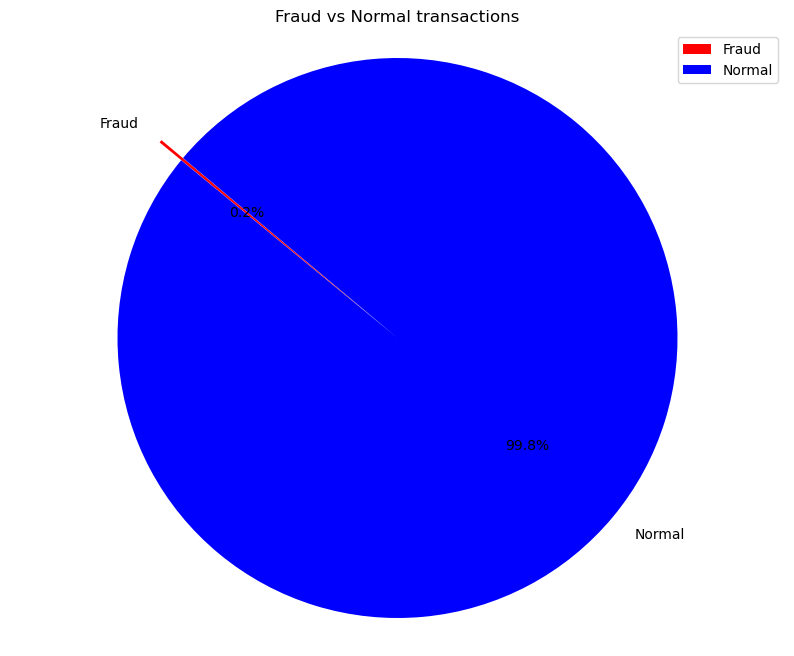

In [59]:
df_fraud = data[data['Class'] == 1]
df_normal = data[data['Class'] == 0]

print("The number of normal transactions (Class 0) are: ", len(df_normal))
print("The number of fraud transactions (Class 1) are: ", len(df_fraud))

# pie chart
labels = ['Fraud', 'Normal']
sizes = [len(df_fraud), len(df_normal)]
colors = ['red', 'blue']
explode = (0.1, 0)
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fraud vs Normal transactions')
plt.axis('equal')
plt.legend()
plt.show()


The dataset is unbalanced. The classifier might take very less or nothing of the no fraud class into the consideration.

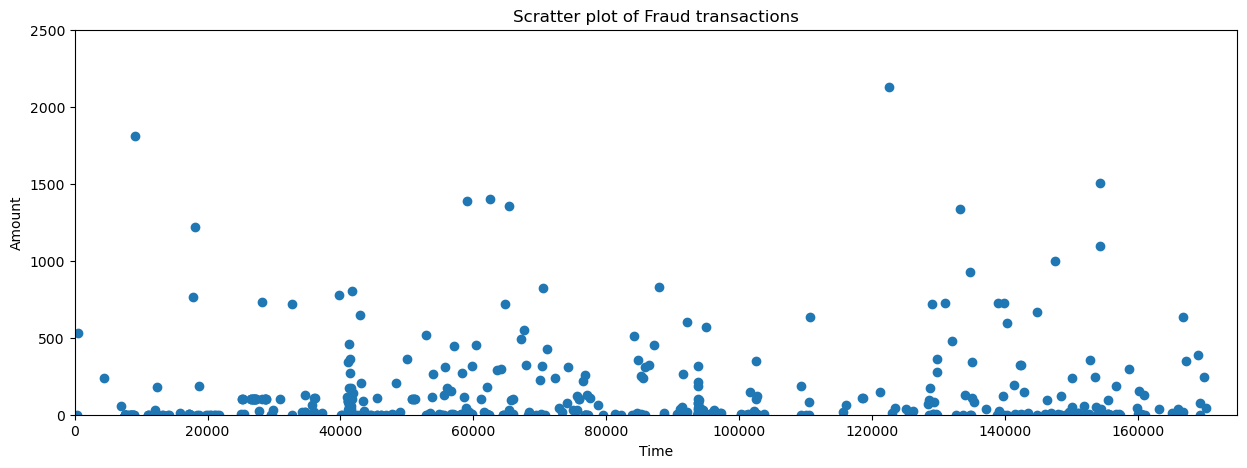

In [60]:
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot of Fraud transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

The time doesn't impact the frequency of frauds

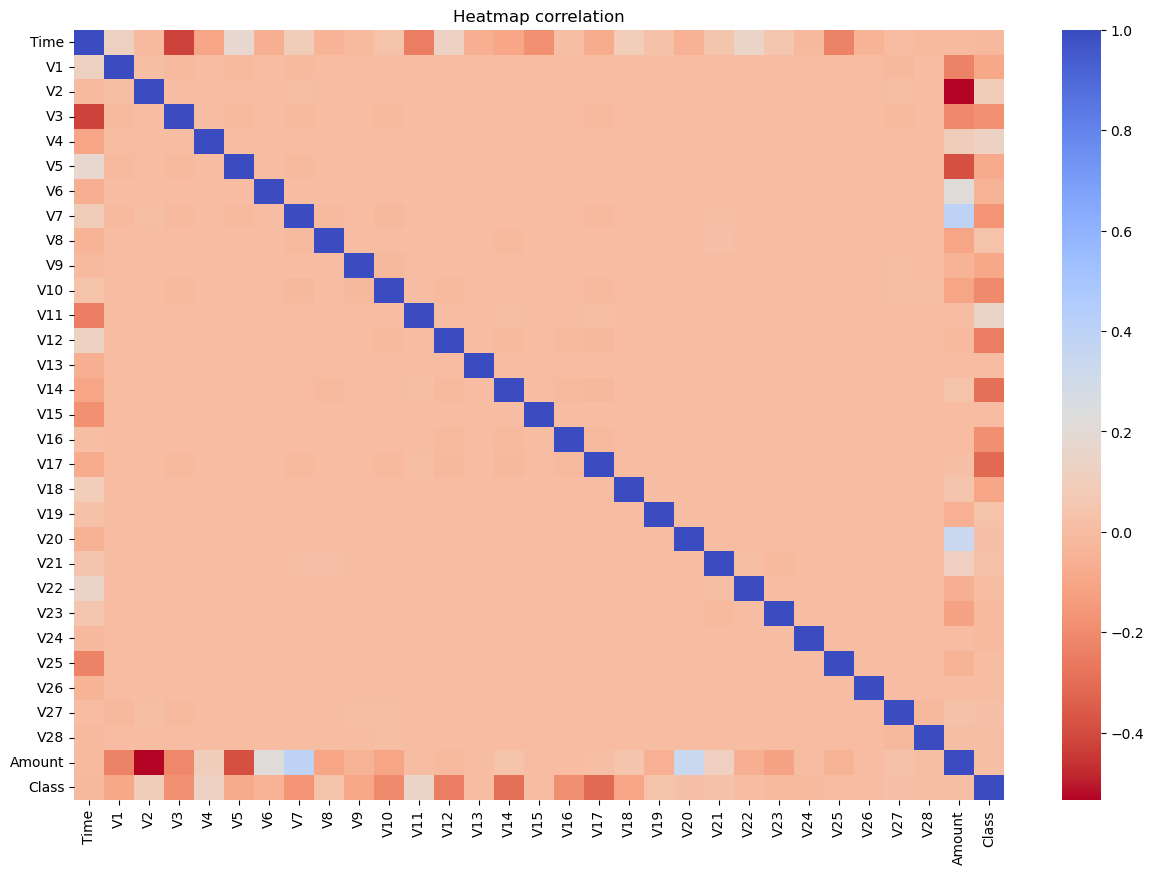

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='coolwarm_r')
plt.title('Heatmap correlation')
plt.show()

We can conclude that there are very few correlated features in it . This waves or points towards the presence of a PCA being applied on this.

### Resampling the data

#### Undersampling

In [62]:
data.shape

(283726, 31)

In [63]:
# Use Nearmist to undersample the data
data_label_0 = data[data['Class'] == 0]
data_label_1 = data[data['Class'] == 1]

print("The number of normal transactions (Class 0) are: ", len(data_label_0))
print("The number of fraud transactions (Class 1) are: ", len(data_label_1))

The number of normal transactions (Class 0) are:  283253
The number of fraud transactions (Class 1) are:  473


In [64]:
data_label_0_sample = data_label_0.sample(int(round(len(data_label_1)*0.7)), random_state=42)
data_label_1_sample = data_label_1.sample(int(round(len(data_label_1)*0.7)), random_state=42)

print("The number of normal transactions (Class 0) are: ", len(data_label_0_sample))    
print("The number of fraud transactions (Class 1) are: ", len(data_label_1_sample))

The number of normal transactions (Class 0) are:  331
The number of fraud transactions (Class 1) are:  331


In [65]:
data_training = pd.concat([data_label_0_sample, data_label_1_sample])
data_training = data_training.sample(frac=1)

data_test = data.drop(data_training.index)

In [66]:
X_train = data_training.drop(['Class', 'Time'], axis=1)
y_train = data_training['Class']
X_test = data_test.drop(['Class', 'Time'], axis=1)
y_test = data_test['Class']

### Applying SVM

#### Linear kernel

In [67]:
model_linear = svm.SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

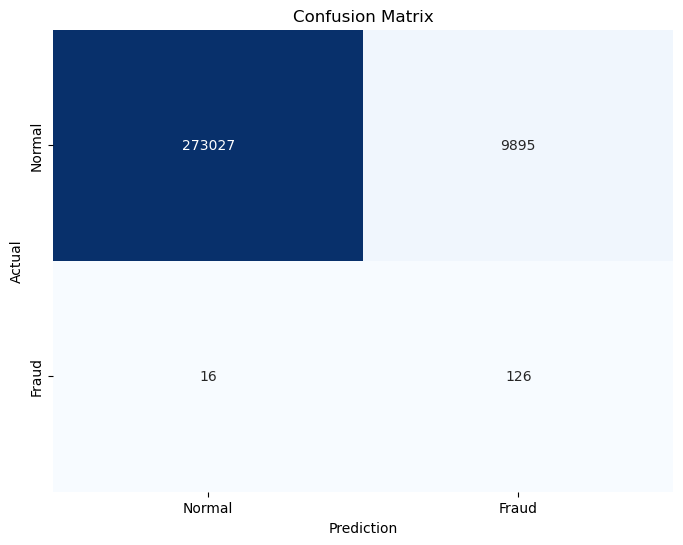

In [68]:
# Confusion matrix visualization
y_pred = model_linear.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report)
df_class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999941,0.012574,0.964987,0.506257,0.999446
recall,0.965026,0.887324,0.964987,0.926175,0.964987
f1-score,0.982173,0.024796,0.964987,0.503485,0.981693
support,282922.000000,142.000000,0.964987,283064.000000,283064.000000


#### rbf kernel

In [70]:
model_rbf = svm.SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

SVC()

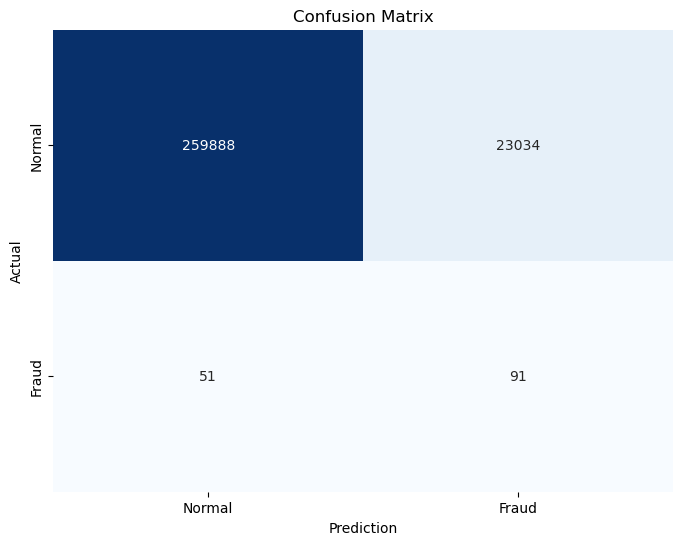

In [71]:
# Confusion matrix visualization
y_pred = model_rbf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report)
df_class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999804,0.003935,0.918446,0.501869,0.999304
recall,0.918585,0.640845,0.918446,0.779715,0.918446
f1-score,0.957475,0.007822,0.918446,0.482649,0.956999
support,282922.000000,142.000000,0.918446,283064.000000,283064.000000


#### poly kernel

In [73]:
model_poly = svm.SVC(kernel='poly')
model_poly.fit(X_train, y_train)

SVC(kernel='poly')

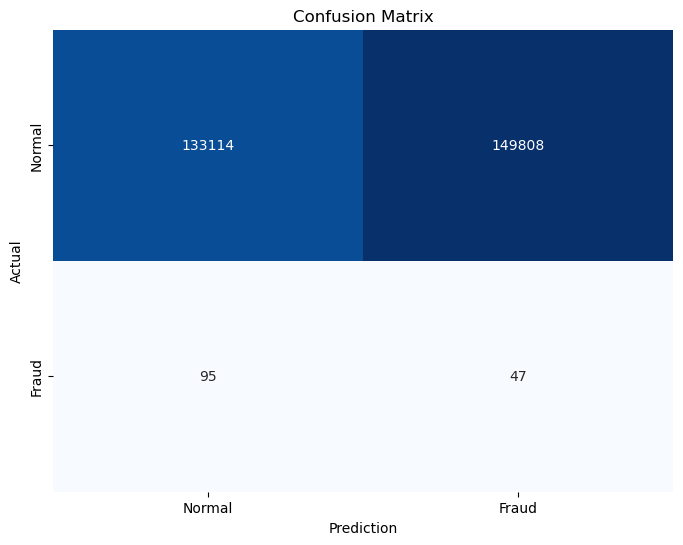

In [79]:
# Confusion matrix visualization
y_pred = model_poly.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report)
df_class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999287,0.000314,0.470427,0.499800,0.998786
recall,0.470497,0.330986,0.470427,0.400742,0.470427
f1-score,0.639770,0.000627,0.470427,0.320198,0.639449
support,282922.000000,142.000000,0.470427,283064.000000,283064.000000


#### sigmoid kernel

In [81]:
model_sigmoid = svm.SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

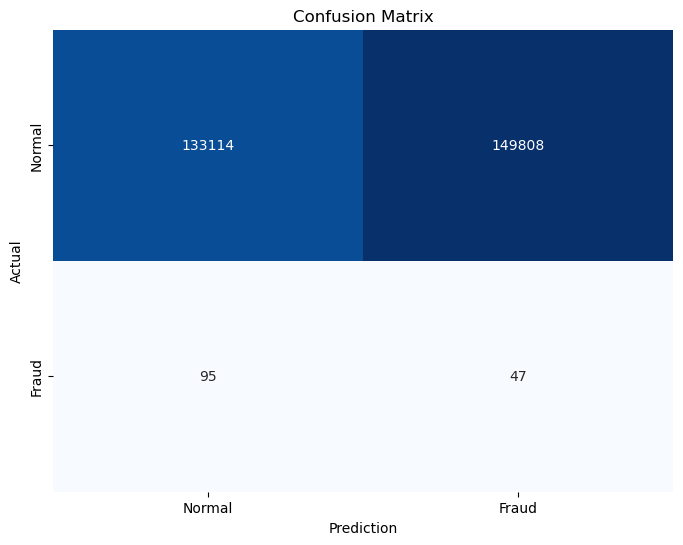

In [82]:
# Confusion matrix visualization
y_pred = model_sigmoid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report)
df_class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.999287,0.000314,0.470427,0.499800,0.998786
recall,0.470497,0.330986,0.470427,0.400742,0.470427
f1-score,0.639770,0.000627,0.470427,0.320198,0.639449
support,282922.000000,142.000000,0.470427,283064.000000,283064.000000


Linear kernel gave the best result ==> Use linear kernel for SVC and optimize it

### Balancing the class weights